Por hacer:

- ~~quizá mejora usando pca en vez de la data cruda~~
- ~~cambiar los sets para que el de entrenamiento tenga el mismo tamaño en cada caso~~
- ~~ver si se puede usar cross validation de algun modo~~
- probar otras ideas de chatgpt
-  ~~probar en todos los otros features~~
- ~~probar método ml 1 a ver si es mejor~~
- ~~probar con un random forest~~
- intentar con la sesión completa aunque sean pocos sujetos y cross val
- ~~probar con solo 2 grupos a ver si se clasifica mejor~~

In [1]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 24.4 MB/s eta 0:00:00


In [2]:
import os
from nilearn import plotting
from nilearn import image
from nilearn.image import load_img
import numpy as np
import matplotlib.pyplot as plt
from nilearn import datasets
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.regions import connected_label_regions
import nibabel as nib
import pandas as pd
from sklearn import svm
from sklearn import metrics

In [3]:
# importamos la data en csv:
from google.colab import drive
drive.mount('/content/drive') # directorio de todas las carpetas

os.chdir("/content/drive/MyDrive/intento_cosas")
luteo = r'/content/drive/MyDrive/intento_cosas/1ALFF_luteal.csv'
menstr = r'/content/drive/MyDrive/intento_cosas/1ALFF_mens.csv'
prolif = r'/content/drive/MyDrive/intento_cosas/1ALFF_prlif.csv'
data0 = r'/content/drive/MyDrive/intento_cosas/data0.csv'
data1 = r'/content/drive/MyDrive/intento_cosas/data1.csv'

Mounted at /content/drive


In [4]:
data_lut = pd.read_csv(luteo, index_col=0)
data_lut = data_lut.sort_values(['file_name'])
data_lut

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
rsfc_103515_01.nii.gz_ALFF+tlrc.BRIK,5755.6157,6092.3013,6314.3520,6424.3570,6035.2173,6187.2770,4282.5015,3909.4587,4811.9414,4652.9580,...,5878.9960,4832.8696,6433.1294,5158.1055,4637.4820,5075.0980,5144.1480,4017.1218,6031.9320,4512.7490
rsfc_103515_02.nii.gz_ALFF+tlrc.BRIK,5696.3438,6496.7686,6280.4380,6108.7314,6303.3870,6202.9463,4582.8090,4305.2637,5176.3850,5585.0547,...,6338.0920,5950.0234,6934.0747,5986.9746,5503.8247,5409.3174,5106.9346,4855.2397,6685.6640,5320.5317
rsfc_103515_03.nii.gz_ALFF+tlrc.BRIK,6519.5874,7757.6484,6919.0415,6950.6790,8162.0770,7786.1704,5744.7820,5129.5825,6320.4570,6539.2163,...,7742.5710,7664.9220,8045.4450,7506.8774,6896.1650,6350.5210,6481.0405,5962.8980,8114.0903,6572.7173
rsfc_104820_01.nii.gz_ALFF+tlrc.BRIK,5829.7550,7302.3354,6906.9730,6017.3940,8969.7350,6626.1790,5344.6850,5757.2260,6300.5474,4550.8580,...,6180.8370,6122.9233,6979.8955,5266.6216,4636.9920,5567.4090,4815.1626,4018.9830,6684.2188,5400.1480
rsfc_104820_02.nii.gz_ALFF+tlrc.BRIK,6444.2236,6849.7910,7135.0693,6354.0747,7532.9614,6635.2110,5338.8647,5919.3975,7389.3745,5580.3984,...,6517.2040,7177.7150,6914.0120,5841.8670,5597.0933,6325.2960,5931.7130,5069.0250,6259.2890,5782.2310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rsfc_809252_02.nii.gz_ALFF+tlrc.BRIK,6339.4604,5283.6704,7133.9023,6882.1333,7065.5430,6316.1196,4168.2000,5362.3750,4365.6587,4392.3640,...,5138.5254,6325.2593,6488.3640,5081.1890,4202.2515,4366.3706,4082.6070,3593.5771,8638.6930,5598.3433
rsfc_809252_03.nii.gz_ALFF+tlrc.BRIK,6167.5570,4924.3950,6952.3545,6592.3990,6766.3610,5513.0680,3683.2537,4935.6978,4160.0530,3993.0764,...,4822.8400,4783.8810,5904.7960,4438.9385,3794.7640,3881.8147,3660.6897,3082.2312,6727.6587,4779.6533
rsfc_822244_01.nii.gz_ALFF+tlrc.BRIK,9307.4630,6059.1333,9090.1700,7924.0430,6417.3647,6689.1997,5814.1143,5594.2040,5074.2017,4738.8047,...,5780.6196,6503.8105,6080.6016,5592.2380,5746.1006,4996.7230,4774.9860,5201.0464,6870.3223,7171.1377


In [5]:
data_men = pd.read_csv(menstr, index_col=0)
data_men = data_men.sort_values(['file_name'])
data_men

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
rsfc_114823_01.nii.gz_ALFF+tlrc.BRIK,7257.0845,6913.4130,5873.7188,6460.4620,7226.4470,6298.3325,4915.5825,6713.6180,8012.0767,6537.4360,...,7573.8667,6715.6543,7346.9130,7167.3047,5611.1160,6678.8000,6867.8174,6639.1387,7988.8200,5327.2090
rsfc_114823_02.nii.gz_ALFF+tlrc.BRIK,6647.5405,6235.0757,6356.4220,6772.5654,7851.9760,6730.4660,5005.1357,6602.1280,7432.4590,5779.5550,...,8039.8590,7968.5024,7194.5410,6686.3315,4636.0190,5806.3057,6209.0664,5745.0650,7759.8843,6086.6670
rsfc_114823_03.nii.gz_ALFF+tlrc.BRIK,6925.7880,6202.5767,7060.6300,6995.4233,7552.7920,6408.0146,5052.1910,6167.3210,7214.2760,5655.3613,...,7493.6675,8113.3228,7076.1560,6571.8486,4936.3574,5436.3086,6174.0923,5914.1333,7092.9175,5903.8696
rsfc_117122_01.nii.gz_ALFF+tlrc.BRIK,7193.6963,6888.1250,7627.1646,6755.5664,7511.0710,8160.7026,5912.9634,6609.4194,6429.5070,6781.9660,...,6099.0110,5612.1960,6980.1320,6738.6177,6191.3320,6430.0030,5836.1416,6235.9640,5486.1846,4368.4697
rsfc_117122_02.nii.gz_ALFF+tlrc.BRIK,7680.8510,7686.6120,7701.0312,6782.8813,8366.6730,9055.0180,6360.8280,6629.7065,6907.1553,7561.6900,...,5894.4750,5791.0283,7941.2256,7372.5780,6740.0370,7163.1350,6468.5713,7110.0547,5914.3906,4482.6978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rsfc_861456_02.nii.gz_ALFF+tlrc.BRIK,5925.2886,7662.9110,5783.7856,5430.5176,5527.7754,6460.3164,5709.9478,6455.2530,7602.2340,7510.4624,...,8039.5890,9756.5870,7053.5320,7655.6410,7154.0840,7341.2666,7635.2600,6917.8994,14341.5010,8353.9000
rsfc_861456_03.nii.gz_ALFF+tlrc.BRIK,8917.7690,10576.3910,8161.6025,6892.1177,7856.2334,8287.2180,8258.5150,8149.2700,10325.3710,10325.7310,...,11085.7780,14768.1200,8535.3900,11247.1930,10721.0560,9907.7210,11761.1070,10020.5510,21670.0310,12951.0040
rsfc_902242_01.nii.gz_ALFF+tlrc.BRIK,9407.6030,20268.1930,9075.3730,18809.1300,30767.0350,28337.0840,9879.7600,9535.9620,21777.6820,10218.4650,...,6145.3784,5132.0990,26061.4060,25114.1230,7760.1370,22793.4320,18289.3320,10759.1390,6522.8804,3606.0237


In [6]:
data_pr = pd.read_csv(prolif, index_col=0)
data_pr = data_pr.sort_values(['file_name'])
data_pr

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_39,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48
file_name,,,,,,,,,,,,,,,,,,,,,
rsfc_101915_01.nii.gz_ALFF+tlrc.BRIK,7472.9380,6027.2085,7178.3440,6898.7236,7162.4263,5956.5635,4726.6910,5421.6533,4541.3490,4004.5254,...,4220.3887,4262.3240,6742.8853,5377.4395,4353.6787,5238.1350,5306.6016,4579.9297,5057.0390,5303.2280
rsfc_101915_02.nii.gz_ALFF+tlrc.BRIK,7948.8050,7557.5180,8366.1770,7927.6370,7956.9890,6967.5930,6964.0146,5813.6260,6490.4190,6664.7686,...,6280.3470,7467.7446,7952.9370,7596.0796,6900.8090,6754.3300,7818.8354,6947.3833,8438.9080,9282.0800
rsfc_101915_03.nii.gz_ALFF+tlrc.BRIK,11693.4750,10503.7390,11242.5750,10602.1230,12010.2090,10037.9160,10928.0750,8113.5240,9263.1820,10334.3420,...,10081.4940,13261.3930,9774.6690,11682.5370,12063.5580,10586.8220,12947.6030,12326.2780,13800.1370,13315.2640
rsfc_128632_01.nii.gz_ALFF+tlrc.BRIK,7091.8296,8523.0970,8278.6220,7264.9690,9142.3810,8691.8290,5909.0513,6929.3154,5949.7837,6450.0947,...,9042.7090,9801.7320,10080.8520,7491.1445,8018.8184,8197.8110,9358.0980,8603.7890,9014.5360,7645.0713
rsfc_128632_02.nii.gz_ALFF+tlrc.BRIK,6985.9995,8552.2190,8152.1430,7496.4673,9027.1730,8464.7690,6297.8580,6177.7720,5596.3853,6233.2593,...,8652.9600,10011.2350,9974.5050,7733.0986,8055.0700,8023.4937,9033.8420,8175.3020,9643.3530,8141.3830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
rsfc_987983_02.nii.gz_ALFF+tlrc.BRIK,9772.5150,7185.1265,11309.6990,8601.0610,9826.6540,9443.0100,6345.6610,5336.0530,5402.9800,5568.8360,...,6377.9033,7006.0850,9924.9080,6121.9050,5698.1750,5970.7793,6025.3890,5504.3955,6964.0483,6591.6310
rsfc_987983_03.nii.gz_ALFF+tlrc.BRIK,8488.9220,6549.5570,10132.9060,7536.7510,7998.3720,8318.0570,5532.5615,4951.5205,5201.2550,5080.3604,...,5991.5283,6766.6910,8137.6357,5438.3423,4572.2544,5560.5283,5206.3867,4747.0596,6442.2754,6144.9814
rsfc_993675_01.nii.gz_ALFF+tlrc.BRIK,5828.2754,5298.6675,6675.8440,6095.8213,5472.1770,5418.1978,4395.6230,5007.6143,4587.7970,3765.9210,...,5314.3354,5504.0400,5666.2340,4425.0350,3853.2588,4075.7334,4238.9230,3867.7603,5369.9414,4367.8920


In [7]:
from sklearn.model_selection import train_test_split

# 2. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = '0'
data_pr['group'] = '1'
data_lut['group'] = '2'

# 2. Definir función para tomar el primer tercio de un DataFrame
mens = 21*3 #int(len(data_men)*0.7)
prlof = 25*3 #int(len(data_pr)*0.7)
lut = 25*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_men_train = data_men.iloc[:mens]
data_pr_train = data_pr.iloc[:prlof]
data_lut_train = data_lut.iloc[:lut]

data_men_test = data_men.iloc[mens:]
data_pr_test = data_pr.iloc[prlof:]
data_lut_test = data_lut.iloc[lut:]

df_all = pd.concat([data_men, data_pr, data_lut], ignore_index=True)
X = df_all.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y = df_all['group']  # Esta será nuestra etiqueta

# 4. Añadir una columna que indique el grupo al que pertenece cada muestra
data_men['group'] = 'menstrual'
data_pr['group'] = 'proliferativo'
data_lut['group'] = 'luteo'


# 5. Concatenar todos los datos en un solo DataFrame
df_all_train = pd.concat([data_men_train, data_pr_train, data_lut_train], ignore_index=True)
df_all_test = pd.concat([data_men_test, data_pr_test, data_lut_test], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train = df_all_train.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train = df_all_train['group']  # Esta será nuestra etiqueta

X_test = df_all_test.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test = df_all_test['group']  # Esta será nuestra etiqueta

# 8. Ahora tienes tus sets de entrenamiento y testeo con el primer tercio de cada grupo:
print(f"Conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de testeo: {X_test.shape[0]} muestras")

Conjunto de entrenamiento: 213 muestras
Conjunto de testeo: 69 muestras


In [ ]:
print(X_train, y_train)
print(X_test, y_test)

         ROI_1      ROI_2      ROI_3      ROI_4      ROI_5      ROI_6  \
0    7257.0845  6913.4130  5873.7188  6460.4620  7226.4470  6298.3325   
1    6647.5405  6235.0757  6356.4220  6772.5654  7851.9760  6730.4660   
2    6925.7880  6202.5767  7060.6300  6995.4233  7552.7920  6408.0146   
3    7193.6963  6888.1250  7627.1646  6755.5664  7511.0710  8160.7026   
4    7680.8510  7686.6120  7701.0312  6782.8813  8366.6730  9055.0180   
..         ...        ...        ...        ...        ...        ...   
208  7869.3430  5424.6800  6492.1543  6001.2925  6505.3170  5936.1080   
209  7358.0166  5536.9277  7182.4450  5728.6416  6886.9090  5844.5680   
210  5818.5303  5461.3984  6147.9280  5176.8720  5534.1500  5106.3840   
211  5757.0513  5390.0703  5859.8880  5258.6104  6630.4365  5971.6040   
212  5679.3193  5488.1120  5982.4330  5126.6740  5584.0645  5098.9297   

         ROI_7      ROI_8      ROI_9     ROI_10  ...     ROI_39     ROI_40  \
0    4915.5825  6713.6180  8012.0767  6537.43

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # escala los datos para tener una media 0 y desviación estándar 1
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(X_train_scaled)

[[ 0.15893617 -0.00229493 -1.10892696 ...  0.59254017 -0.12801069
  -0.39367162]
 [-0.24333061 -0.36401803 -0.77450783 ...  0.17115662 -0.19061761
  -0.06509595]
 [-0.05970199 -0.38134811 -0.28662909 ...  0.25083976 -0.37301268
  -0.14418233]
 ...
 [-0.79043345 -0.77658116 -0.91895349 ... -1.04126846 -0.57778991
  -1.07938461]
 [-0.83100633 -0.81461684 -1.118509   ... -1.16449404 -0.86286784
  -1.24567827]
 [-0.88230534 -0.76233614 -1.03360923 ... -1.01192759 -0.66128793
  -1.07911611]]


In [9]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train = y_train.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled = pd.DataFrame(X_train_scaled)
print(X_train_scaled)


           0         1         2         3         4         5         6   \
0    0.158936 -0.002295 -1.108927 -0.257359 -0.215695 -0.336283 -0.387088   
1   -0.243331 -0.364018 -0.774508 -0.091256  0.030537 -0.179955 -0.334476   
2   -0.059702 -0.381348 -0.286629  0.027351 -0.087233 -0.296604 -0.306831   
3    0.117103 -0.015780  0.105869 -0.100303 -0.103656  0.337444  0.198870   
4    0.438600  0.410013  0.157044 -0.085765  0.233140  0.660969  0.461989   
..        ...       ...       ...       ...       ...       ...       ...   
208  0.562994 -0.796161 -0.680472 -0.501732 -0.499558 -0.467320 -0.972433   
209  0.225546 -0.736305 -0.202235 -0.646838 -0.349349 -0.500435 -0.585625   
210 -0.790433 -0.776581 -0.918953 -0.940493 -0.881844 -0.767479 -1.002230   
211 -0.831006 -0.814617 -1.118509 -0.896991 -0.450306 -0.454479 -1.019753   
212 -0.882305 -0.762336 -1.033609 -0.967209 -0.862196 -0.770176 -1.022189   

           7         8         9   ...        38        39        40  \
0  

In [10]:
# Definir los índices correspondientes a cada grupo
grupo_1_indices = np.arange(0, mens) #np.arange(0, 51)   # Primer grupo (y_train = 0)
grupo_2_indices = np.arange(mens, mens +prlof) #np.arange(51, 132) # Segundo grupo (y_train = 1)
grupo_3_indices = np.arange(mens + prlof, mens + prlof + lut) #np.arange(132, 196) # Tercer grupo (y_train = 2)

print(grupo_1_indices)
print(grupo_2_indices)
print(grupo_3_indices)

# Extraer los subconjuntos de X_train_scaled correspondientes a cada grupo
grupo_1 = X_train_scaled.iloc[grupo_1_indices]
grupo_2 = X_train_scaled.iloc[grupo_2_indices]
grupo_3 = X_train_scaled.iloc[grupo_3_indices]

# grupo_1 = X_train.iloc[grupo_1_indices]
# grupo_2 = X_train.iloc[grupo_2_indices]
# grupo_3 = X_train.iloc[grupo_3_indices]

# Imprimir los grupos
print("Grupo 1 (y_train = 0):")
print(grupo_1)

print("\nGrupo 2 (y_train = 1):")
print(grupo_2)

print("\nGrupo 3 (y_train = 2):")
print(grupo_3)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
[ 63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134
 135 136 137]
[138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212]
Grupo 1 (y_train = 0):
          0         1         2         3         4         5         6   \
0   0.158936 -0.002295 -1.108927 -0.257359 -0.215695 -0.336283 -0.387088   
1  -0.243331 -0.3640

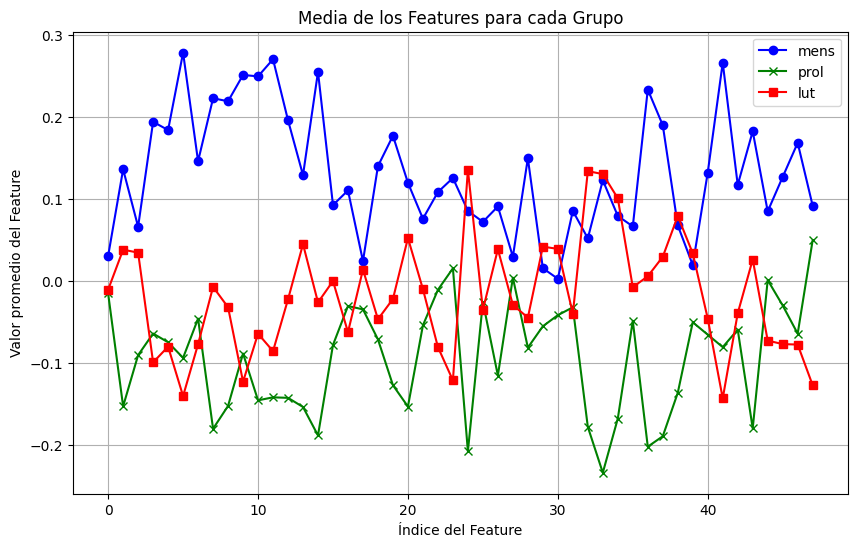

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

media_grupo_1 = np.mean(grupo_1, axis=0)
media_grupo_2 = np.mean(grupo_2, axis=0)
media_grupo_3 = np.mean(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo
plt.plot(media_grupo_1, marker='o', label='mens', color='blue')
plt.plot(media_grupo_2, marker='x', label='prol', color='green')
plt.plot(media_grupo_3, marker='s', label='lut', color='red')

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()



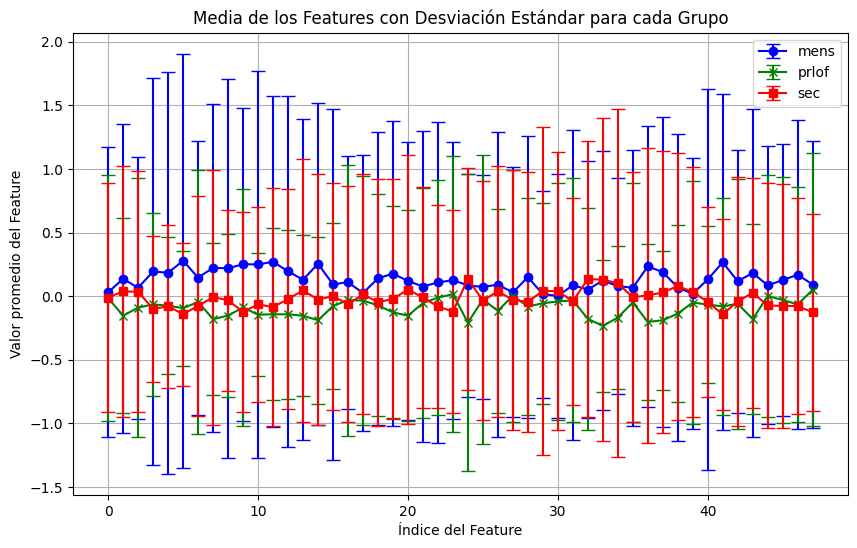

In [12]:
import numpy as np
import matplotlib.pyplot as plt

std_grupo_1 = np.std(grupo_1, axis=0)
std_grupo_2 = np.std(grupo_2, axis=0)
std_grupo_3 = np.std(grupo_3, axis=0)

# Gráfica de las medias de cada feature para los 3 grupos con barras de error
plt.figure(figsize=(10, 6))

# Graficar las medias de los features para cada grupo con barras de error (desviación estándar)
plt.errorbar(range(len(media_grupo_1)), media_grupo_1, yerr=std_grupo_1, marker='o', label='mens', color='blue', capsize=5)
plt.errorbar(range(len(media_grupo_2)), media_grupo_2, yerr=std_grupo_2, marker='x', label='prlof', color='green', capsize=5)
plt.errorbar(range(len(media_grupo_3)), media_grupo_3, yerr=std_grupo_3, marker='s', label='sec', color='red', capsize=5)

# Configuración de la gráfica
plt.xlabel('Índice del Feature')
plt.ylabel('Valor promedio del Feature')
plt.title('Media de los Features con Desviación Estándar para cada Grupo')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


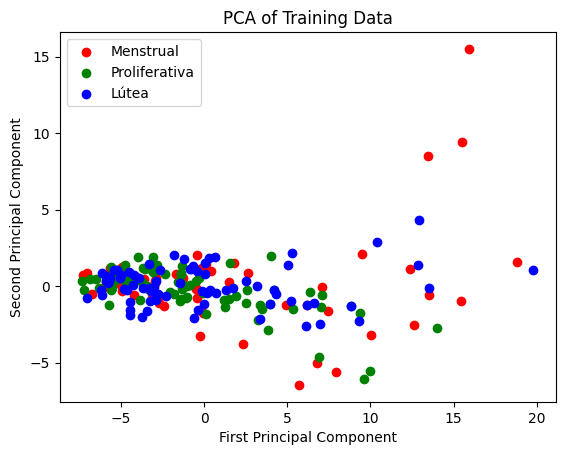

In [ ]:
# graficamos nuestra data a ver cómo se comporta

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Configurar los colores y etiquetas para cada grupo
colors = ['r', 'g', 'b']  # Elige los colores que representarán a los grupos
labels = ['Menstrual', 'Proliferativa', 'Lútea']  # Nombres de los grupos
unique_labels = np.unique(y_train)  # Obtener los grupos únicos

# Graficar y agregar la leyenda
for i, label in enumerate(unique_labels):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1],
                color=colors[i], label=labels[i])

plt.title('PCA of Training Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend()
plt.show()


In [ ]:
# este es para buscar los mejores parámetros para el svm.

from sklearn.model_selection import GridSearchCV
from sklearn import svm

# Definir el grid de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'linear']
}

# Inicializar el modelo GridSearchCV con SVC
grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)

# Entrenar el modelo con los datos originales (X_train_scaled)
grid.fit(X_train_scaled, y_train)

# Entrenar el modelo con los datos PCA (X_pca)
grid_pca = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=2)
grid_pca.fit(X_pca, y_train)

# Mostrar los mejores parámetros y puntajes para cada caso
print("Mejores hiperparámetros (X_train_scaled):", grid.best_params_)
print("Mejor puntaje (X_train_scaled):", grid.best_score_)

print("Mejores hiperparámetros (X_pca):", grid_pca.best_params_)
print("Mejor puntaje (X_pca):", grid_pca.best_score_)



Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, 

In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled, y_train)
y_predict = classifier.predict(X_test_scaled)

In [ ]:
metrics.accuracy_score(y_test, y_predict)

0.43478260869565216

In [ ]:
y_predict2 = grid.predict(X_test_scaled)

accuracy = metrics.accuracy_score(y_test, y_predict2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.6086956521739131


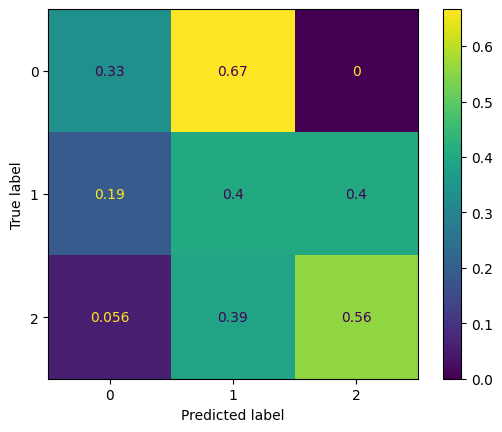

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

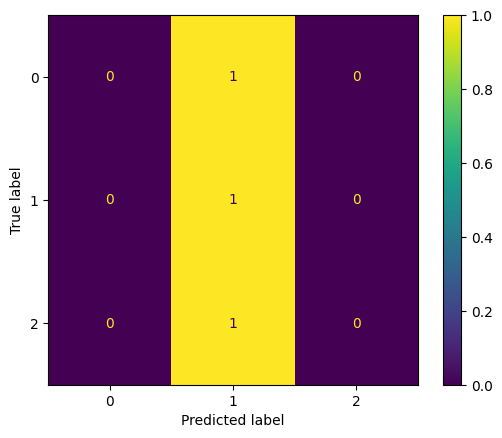

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
classif = svm.SVC()
classif.fit(X_pca, y_train)

X_test_pca = pca.transform(X_test_scaled)  # Asegúrate de transformar tu conjunto de prueba

y_pred = classif.predict(X_test_pca)  # Predecir con el modelo entrenado en los datos transformados

accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.4927536231884058


In [ ]:
y_pred2 = grid_pca.predict(X_test_pca)
accuracy = metrics.accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy}")

Accuracy: 0.5652173913043478


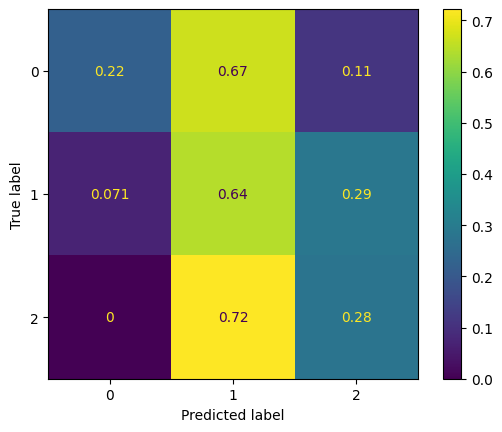

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

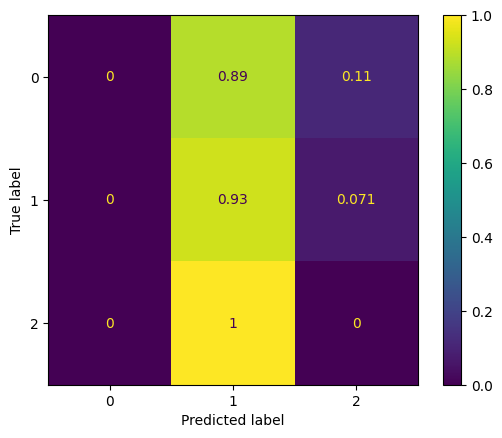

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

Ojo, puede que cross validation esté muy sobreajustado por estar usando a los mismos sujetos, quizá es mejor hacer los folds a mano

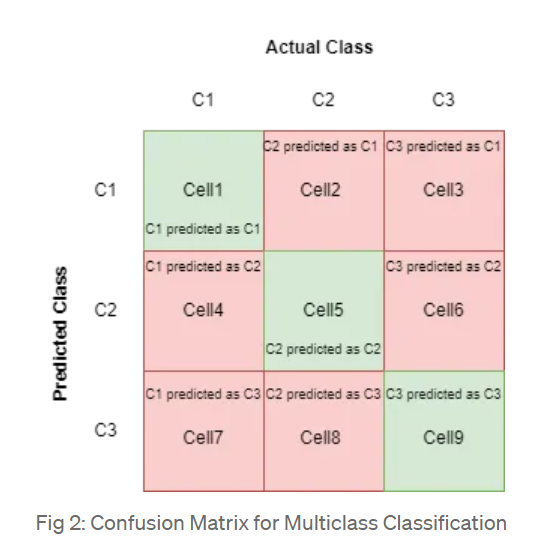

In [ ]:
# Para hacer cross-validation:
from sklearn.model_selection import GroupKFold
import numpy as np

# Número total de grupos
n_groups = X.shape[0]/3

# Crear el array repitiendo cada número 3 veces
groups = np.repeat(np.arange(n_groups), 3) # ponemos aquí nuestros 200 sujetos

#
# Para que esto funcione debo definir X e y al inicio  !!!!!!!!!!!!!!!
#

# Definir GroupKFold
gkf = GroupKFold(n_splits=3) # número de folds

In [ ]:
print(X, y)

          ROI_1      ROI_2      ROI_3      ROI_4      ROI_5      ROI_6  \
0     7257.0845  6913.4130  5873.7188  6460.4620  7226.4470  6298.3325   
1     6647.5405  6235.0757  6356.4220  6772.5654  7851.9760  6730.4660   
2     6925.7880  6202.5767  7060.6300  6995.4233  7552.7920  6408.0146   
3     7193.6963  6888.1250  7627.1646  6755.5664  7511.0710  8160.7026   
4     7680.8510  7686.6120  7701.0312  6782.8813  8366.6730  9055.0180   
..          ...        ...        ...        ...        ...        ...   
277   6339.4604  5283.6704  7133.9023  6882.1333  7065.5430  6316.1196   
278   6167.5570  4924.3950  6952.3545  6592.3990  6766.3610  5513.0680   
279   9307.4630  6059.1333  9090.1700  7924.0430  6417.3647  6689.1997   
280  10701.0490  5799.4717  8616.5960  7746.1490  6381.9575  6166.3700   
281   9300.4920  5399.0810  7633.5854  7105.5957  5918.4214  5886.0244   

         ROI_7      ROI_8      ROI_9     ROI_10  ...     ROI_39     ROI_40  \
0    4915.5825  6713.6180  8012.0

              precision    recall  f1-score   support

           0       0.67      0.22      0.33         9
           1       0.76      0.74      0.75        42
           2       0.44      0.61      0.51        18

    accuracy                           0.64        69
   macro avg       0.62      0.52      0.53        69
weighted avg       0.66      0.64      0.63        69

              precision    recall  f1-score   support

           0       1.00      0.22      0.36         9
           1       0.68      0.95      0.79        42
           2       0.75      0.33      0.46        18

    accuracy                           0.70        69
   macro avg       0.81      0.50      0.54        69
weighted avg       0.74      0.70      0.65        69

              precision    recall  f1-score   support

           0       1.00      0.33      0.50         9
           1       0.66      1.00      0.79        42
           2       1.00      0.11      0.20        18

    accuracy        

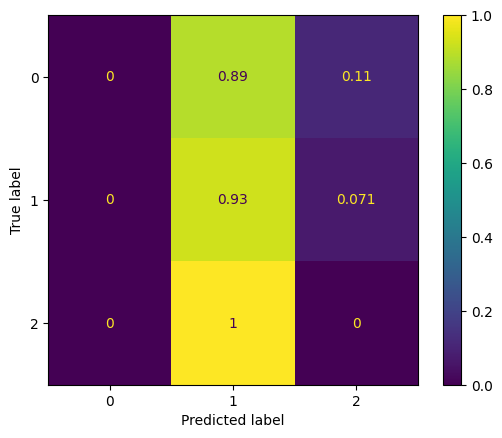

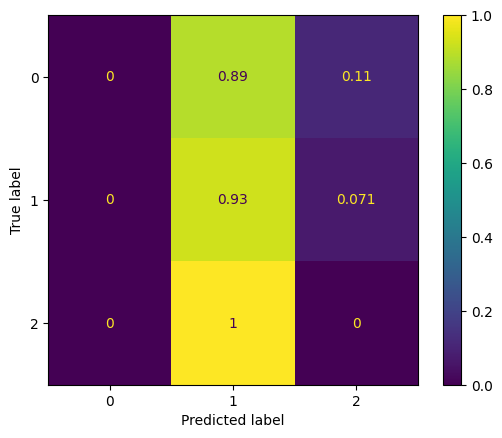

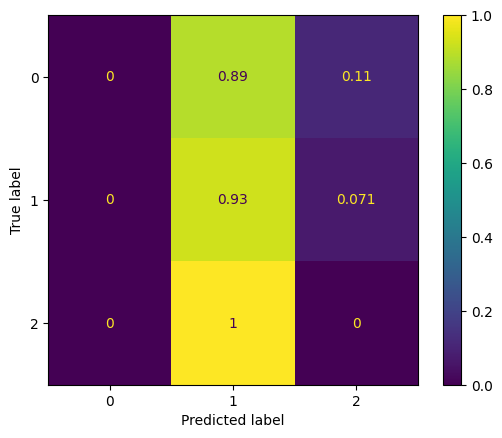

In [ ]:
from sklearn.metrics import classification_report

# Iterar sobre los splits
for train_idx, test_idx in gkf.split(X, y, groups):
    # Dividir los datos de entrenamiento y prueba
    X_train2, X_test2 = X.loc[train_idx], X.loc[test_idx]
    y_train2, y_test2 = y.loc[train_idx], y.loc[test_idx]
    classif.fit(X_train2, y_train2)
    y_pred = classif.predict(X_test)
    print(classification_report(y_test, y_pred))
    conf_mat = metrics.confusion_matrix(y_test, y_pred2, normalize="true")
    plot = metrics.ConfusionMatrixDisplay(conf_mat)
    plot.plot()


In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.35087719, 0.31578947, 0.35714286, 0.32142857, 0.44642857])

In [ ]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.36 accuracy with a standard deviation of 0.05


# Random Forest:

Probaremos ahora con otro modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest.predict(X_test)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.463768115942029
Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.33      0.24         9
           1       0.62      0.48      0.54        42
           2       0.43      0.50      0.46        18

    accuracy                           0.46        69
   macro avg       0.41      0.44      0.41        69
weighted avg       0.52      0.46      0.48        69



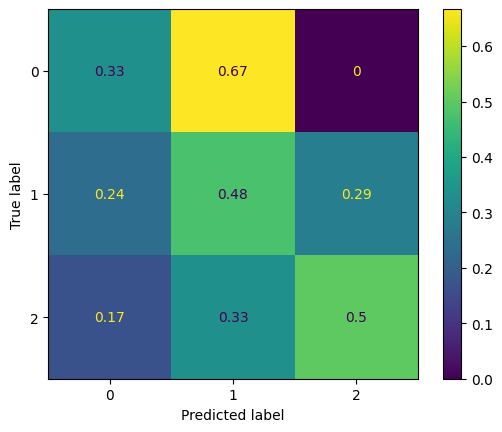

In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Obtener las importancias de cada feature
importances = random_forest.feature_importances_

# Crear un DataFrame para visualizar mejor las importancias
feature_names = X.columns  # Asumiendo que X es un DataFrame con los nombres de los ROIs
importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Ordenar de mayor a menor importancia
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir las características más importantes
print(importances_df.head(10))  # Las 10 características más importantes

   Feature  Importance
24  ROI_25    0.062531
37  ROI_38    0.041457
15  ROI_16    0.030771
5    ROI_6    0.029496
40  ROI_41    0.028925
1    ROI_2    0.028599
36  ROI_37    0.027728
13  ROI_14    0.026205
33  ROI_34    0.025502
14  ROI_15    0.024860


In [ ]:
data0 = pd.read_csv(data0, index_col=0)
data0 = data0.sort_values(['file_name'])
data0

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48,label
file_name,,,,,,,,,,,,,,,,,,,,,
reho_101915_01.nii.gz,0.112196,0.084254,0.114575,0.130140,0.097832,0.083878,0.106819,0.084232,0.083721,0.092766,...,0.087177,0.086403,0.081511,0.094237,0.080986,0.076708,0.107187,0.113691,0.127849,0
reho_101915_02.nii.gz,0.106132,0.090379,0.118868,0.133973,0.105299,0.083008,0.125611,0.087686,0.102147,0.115516,...,0.105223,0.095632,0.095918,0.112733,0.089382,0.093438,0.112325,0.139829,0.172106,0
reho_101915_03.nii.gz,0.136023,0.109564,0.146728,0.165369,0.134313,0.114471,0.171469,0.108751,0.117152,0.141463,...,0.171787,0.114585,0.122906,0.156167,0.103581,0.128886,0.163304,0.208973,0.200060,0
reho_114823_01.nii.gz,0.098168,0.103000,0.091666,0.099660,0.100664,0.094352,0.106090,0.090065,0.108003,0.129885,...,0.112206,0.087697,0.109259,0.113825,0.101802,0.109027,0.116037,0.125050,0.106929,0
reho_114823_02.nii.gz,0.094985,0.095484,0.094395,0.109103,0.112314,0.098030,0.109451,0.091530,0.109623,0.119361,...,0.128801,0.094119,0.106770,0.099649,0.095777,0.100362,0.105208,0.121393,0.129679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_987983_02.nii.gz,0.107257,0.095688,0.133563,0.114435,0.112089,0.125441,0.127111,0.098934,0.092705,0.119590,...,0.095206,0.096607,0.104086,0.128956,0.083474,0.101507,0.116818,0.130435,0.127002,0
reho_987983_03.nii.gz,0.107982,0.090448,0.137568,0.115386,0.105471,0.120274,0.127586,0.098603,0.089625,0.120603,...,0.105364,0.091705,0.099144,0.121386,0.082493,0.097610,0.115533,0.125524,0.135152,0
reho_993675_01.nii.gz,0.092369,0.085316,0.117211,0.113641,0.093215,0.111189,0.110474,0.092859,0.096076,0.111238,...,0.095000,0.085663,0.093245,0.106913,0.082015,0.088087,0.103504,0.083145,0.121677,0


In [ ]:
data1 = pd.read_csv(data1, index_col=0)
data1 = data1.sort_values(['file_name'])
data1

,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,ROI_9,ROI_10,...,ROI_40,ROI_41,ROI_42,ROI_43,ROI_44,ROI_45,ROI_46,ROI_47,ROI_48,label
file_name,,,,,,,,,,,,,,,,,,,,,
reho_103515_01.nii.gz,0.126868,0.125040,0.132629,0.150431,0.122129,0.155236,0.147480,0.101300,0.144868,0.147198,...,0.140267,0.115820,0.135446,0.134104,0.114982,0.122126,0.114289,0.186695,0.146829,2
reho_103515_02.nii.gz,0.117034,0.120067,0.123126,0.135687,0.108431,0.142732,0.138872,0.094138,0.107491,0.134952,...,0.149089,0.111696,0.132735,0.133842,0.105599,0.111665,0.115569,0.180560,0.144896,2
reho_103515_03.nii.gz,0.119377,0.127955,0.130744,0.146408,0.121137,0.159758,0.149584,0.099339,0.124721,0.145487,...,0.157530,0.121664,0.142017,0.145009,0.112962,0.116078,0.125638,0.182627,0.153563,2
reho_104820_01.nii.gz,0.094101,0.093661,0.105955,0.105048,0.111334,0.094647,0.116148,0.091454,0.113488,0.106066,...,0.088878,0.075128,0.082627,0.093604,0.090289,0.086635,0.095511,0.116061,0.109925,2
reho_104820_02.nii.gz,0.090125,0.087574,0.100393,0.102698,0.105817,0.097145,0.110656,0.090076,0.107220,0.107114,...,0.091627,0.077113,0.081793,0.100111,0.083973,0.092112,0.096893,0.119371,0.123192,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
reho_809252_02.nii.gz,0.097721,0.072003,0.100846,0.113762,0.123669,0.091690,0.094097,0.104420,0.085672,0.096234,...,0.091753,0.080870,0.080480,0.079509,0.070289,0.072509,0.072048,0.123611,0.125974,2
reho_809252_03.nii.gz,0.096892,0.069390,0.098768,0.111562,0.117235,0.081955,0.086162,0.099268,0.081995,0.096293,...,0.091230,0.076234,0.076587,0.075988,0.067452,0.071498,0.071810,0.119049,0.127158,2
reho_822244_01.nii.gz,0.131673,0.080766,0.122397,0.143645,0.087513,0.094301,0.110220,0.114820,0.100899,0.094883,...,0.103473,0.075734,0.090125,0.123477,0.074559,0.074617,0.102006,0.114747,0.127791,2


In [ ]:
pip install tensorflow

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Convertir las etiquetas a one-hot encoding (ya que son 3 clases)
y_onehot = to_categorical(y_encoded)

# Dividir en sets de entrenamiento y prueba (X_train, X_test, y_train, y_test)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled1, y_train1, epochs=50, batch_size=16, validation_data=(X_test_scaled1, y_test1))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled1, y_test1)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.3275 - loss: 1.2029 - val_accuracy: 0.5088 - val_loss: 1.0334
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4536 - loss: 1.0797 - val_accuracy: 0.5789 - val_loss: 1.0127
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5108 - loss: 1.0057 - val_accuracy: 0.5439 - val_loss: 1.0102
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5681 - loss: 0.9704 - val_accuracy: 0.5965 - val_loss: 0.9744
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6089 - loss: 0.9626 - val_accuracy: 0.6316 - val_loss: 0.9658
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5962 - loss: 0.9371 - val_accuracy: 0.6316 - val_loss: 0.9463
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6183 - loss: 0.9180 - val_accuracy: 0.6140 - val_loss: 0.9440
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6617 - loss: 0.8943 - val_accuracy: 0.5789 - val

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Matriz de confusión:
[[11  2  1]
 [ 3 15  2]
 [ 2  6 15]]


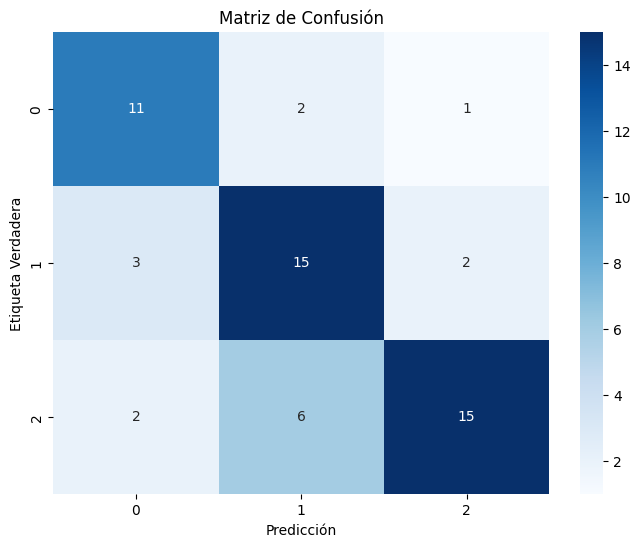

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled1)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_test1, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test = encoder.fit_transform(y_test)
y_encoded_train = encoder.fit_transform(y_train)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_onehot_test = to_categorical(y_encoded_test)
y_onehot_train = to_categorical(y_encoded_train)

print(y_onehot_test)
print(y_onehot_train)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1

In [ ]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled1.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(3, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_onehot_train, epochs=50, batch_size=16, validation_data=(X_test_scaled, y_onehot_test))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled, y_onehot_test)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.3678 - loss: 1.1397 - val_accuracy: 0.4203 - val_loss: 1.1019
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.4153 - loss: 1.0579 - val_accuracy: 0.3478 - val_loss: 1.1411
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5428 - loss: 1.0113 - val_accuracy: 0.4493 - val_loss: 1.0961
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6526 - loss: 0.9397 - val_accuracy: 0.4638 - val_loss: 1.1108
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6558 - loss: 0.9081 - val_accuracy: 0.5072 - val_loss: 1.0914
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6478 - loss: 0.8893 - val_accuracy: 0.4783 - val_loss: 1.0883
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6992 - loss: 0.8632 - val_accuracy: 0.4348 - val_loss: 1.1203
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8007 - loss: 0.7833 - val_accuracy: 0.4783 - va

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Matriz de confusión:
[[ 4  5  0]
 [15 19  8]
 [ 4  8  6]]


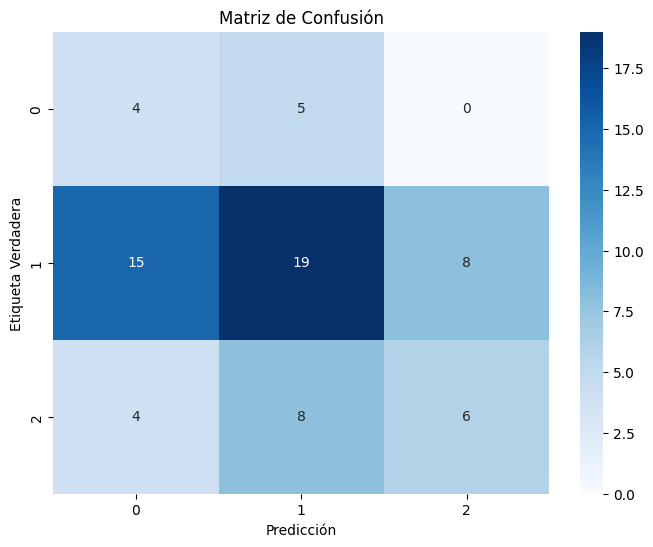

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()



In [ ]:
#df_dos = pd.concat([data_men, data_pr], ignore_index=True)
df_dos = pd.concat([ data_men], ignore_index=True)

prlof = 20*3 #int(len(data_pr)*0.7)
lut = 20*3 #int(len(data_lut)*0.7)

# 3. Tomar solo el primer tercio de cada grupo
data_fol_train2 = df_dos.iloc[:prlof]
data_lut_train2 = data_lut.iloc[:lut]

data_fol_test2 = df_dos.iloc[prlof:]
data_lut_test2 = data_lut.iloc[lut:]

data_fol_train2 = data_fol_train2.drop(columns=['group'])
data_lut_train2 = data_lut_train2.drop(columns=['group'])
data_fol_train2['group'] = '0'
data_lut_train2['group'] = '1'

data_fol_test2 = data_fol_test2.drop(columns=['group'])
data_lut_test2 = data_lut_test2.drop(columns=['group'])
data_fol_test2['group'] = '0'
data_lut_test2['group'] = '1'

# 5. Concatenar todos los datos en un solo DataFrame
df_all_train2 = pd.concat([data_fol_train2, data_lut_train2], ignore_index=True)
df_all_test2 = pd.concat([data_fol_test2, data_lut_test2], ignore_index=True)

# 6. Definir las características (X) y la etiqueta/grupo (y)
X_train2 = df_all_train2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_train2 = df_all_train2['group']  # Esta será nuestra etiqueta


X_test2 = df_all_test2.drop(columns=['group'])  # Eliminar la columna de grupo para usar solo las features
y_test2 = df_all_test2['group']  # Esta será nuestra etiqueta



In [ ]:
import numpy as np

# Asegúrate de que los índices de y_train y X_train_scaled coincidan
y_train2 = y_train2.reset_index(drop=True)

# Escalar los datos de X_train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)

# Convertir X_train_scaled a DataFrame para facilitar la manipulación de índices
X_train_scaled2 = pd.DataFrame(X_train_scaled2)
X_test_scaled2 = scaler.transform(X_test2)


In [ ]:
classifier = svm.SVC() # mejor version:
# classifier = svm.SVC(kernel='rbf', gamma=0.1, C=100)
# classifier = svm.SVC(kernel='poly', degree=3, C=0.01)
# classifier = svm.SVC(kernel='linear')

classifier.fit(X_train_scaled2, y_train2)
y_predict2 = classifier.predict(X_test_scaled2)

In [ ]:
metrics.accuracy_score(y_test2, y_predict2)

0.5555555555555556

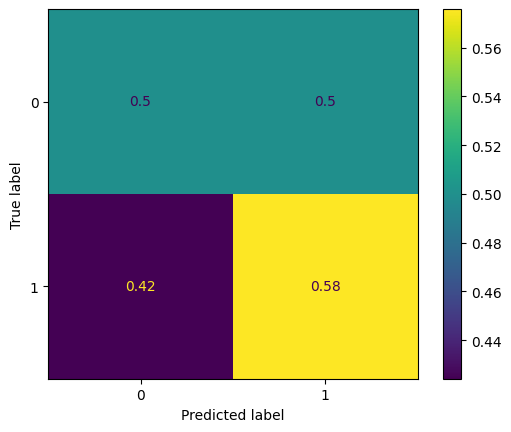

In [ ]:
conf_mat = metrics.confusion_matrix(y_test2, y_predict2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train2, y_train2)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred2 = random_forest.predict(X_test2)

# Imprimir los resultados de las métricas
print("Accuracy:", accuracy_score(y_test2, y_pred2))
print("Classification Report:\n", classification_report(y_test2, y_pred2))

Accuracy: 0.4444444444444444
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.67      0.39        12
           1       0.75      0.36      0.49        33

    accuracy                           0.44        45
   macro avg       0.51      0.52      0.44        45
weighted avg       0.62      0.44      0.46        45



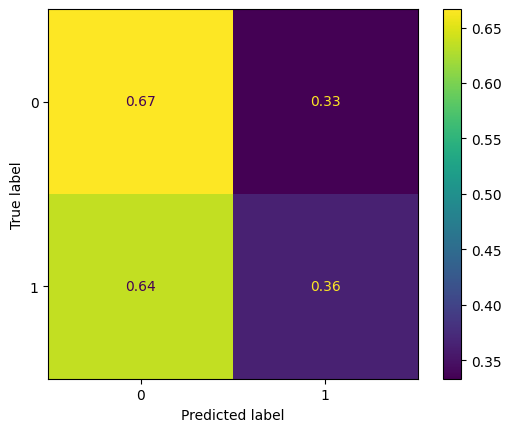

In [ ]:
conf_mat = metrics.confusion_matrix(y_test2, y_pred2, normalize="true")
plot = metrics.ConfusionMatrixDisplay(conf_mat)
plot.plot()

In [ ]:
# Codificar las etiquetas (labels)
encoder = LabelEncoder()
y_encoded_test2 = encoder.fit_transform(y_test2)
y_encoded_train2 = encoder.fit_transform(y_train2)

# Estandarizar los datos (normalizar los features)
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

y_onehot_test2 = to_categorical(y_encoded_test2)
y_onehot_train2 = to_categorical(y_encoded_train2)

print(y_onehot_test2)
print(y_onehot_train2)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]


In [ ]:

# Crear el modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled2.shape[1], activation='relu'))  # Capa de entrada
model.add(Dense(32, activation='relu'))  # Capa oculta
model.add(Dense(2, activation='softmax'))  # Capa de salida (tres clases)

# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled2, y_onehot_train2, epochs=50, batch_size=16, validation_data=(X_test_scaled2, y_onehot_test2))

# Evaluar el modelo en el set de prueba
loss, accuracy = model.evaluate(X_test_scaled2, y_onehot_test2)
print(f"Precisión del modelo en el set de prueba: {accuracy * 100:.2f}%")

# Hacer predicciones con el modelo entrenado
predicciones = model.predict(X_test_scaled2)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - accuracy: 0.3302 - loss: 0.7713 - val_accuracy: 0.4667 - val_loss: 0.6952
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5385 - loss: 0.6990 - val_accuracy: 0.5333 - val_loss: 0.6946
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5764 - loss: 0.6612 - val_accuracy: 0.4667 - val_loss: 0.6971
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7147 - loss: 0.6108 - val_accuracy: 0.3556 - val_loss: 0.7136
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7387 - loss: 0.5995 - val_accuracy: 0.4000 - val_loss: 0.7124
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8455 - loss: 0.5623 - val_accuracy: 0.4667 - val_loss: 0.6997
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8498 - loss: 0.5330 - val_accuracy: 0.4667 - val_loss: 0.6957
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9070 - loss: 0.4904 - val_accuracy: 0.3778 - val_loss: 0.7153
Epoch 9/50
8/8 ━

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Matriz de confusión:
[[ 5  7]
 [20 13]]


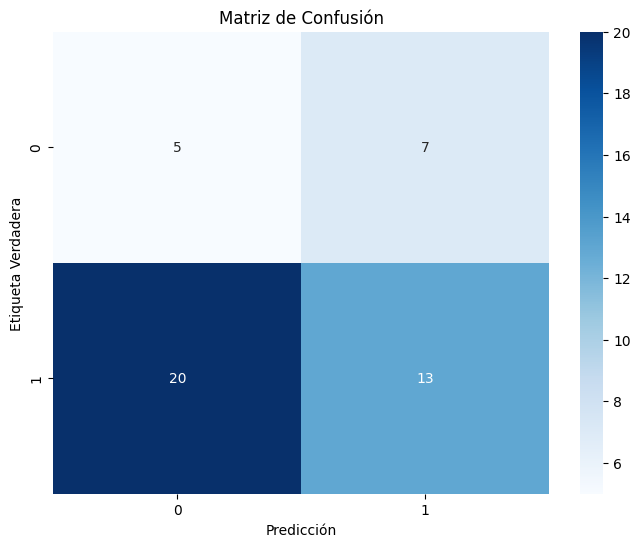

In [ ]:
# Hacer predicciones en el set de prueba
predicciones = model.predict(X_test_scaled2)

# Convertir las predicciones de one-hot encoding a clases
y_pred_classes = np.argmax(predicciones, axis=1)

# Convertir las etiquetas verdaderas (y_test) de one-hot encoding a clases
y_true_classes = np.argmax(y_onehot_test2, axis=1)

# Generar la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(conf_matrix)

# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()